In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
X = pd.read_csv('filtered_df.csv')
X.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54
1,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3
2,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3
3,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24
4,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166


In [3]:
X.condition.value_counts()


Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [4]:
X1 = X.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)
X1.head()

,condition,review
0,Depression,"""I have taken anti-depressants for years, with..."
1,Depression,"""1 week on Zoloft for anxiety and mood swings...."
2,Depression,"""my gp started me on Venlafaxine yesterday to ..."
3,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
4,Depression,"""This medicine saved my life. I was at my wits..."


In [5]:
X1.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [6]:
#data preprocessing

In [7]:
for i, col in enumerate(X1.columns):
    X1.iloc[:, i] = X1.iloc[:, i].str.replace('"', '')

In [8]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

<ipython-input-8-a7edaab304c3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [9]:
#What are stopwords ?
#Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

#The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
#Lemmitization
#Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words,
# normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .



In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()


In [14]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [17]:
from bs4 import BeautifulSoup
import re


In [18]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [19]:
X1['review_clean'] = X1['review'].apply(review_to_words)
X1.head()


<ipython-input-18-96d5791fc591>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


,condition,review,review_clean
0,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
1,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
2,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better",gp started venlafaxine yesterday help depression change hour taking feeling sick stomach food fluid thought keep told come side effect would get better took another one last night ill stand sick sweating shaking thought going pas get sleep hopeing feel better morning took another one felt spaced dry mouth shaking sick booked see gp make sure feeling like find put wrong dose mg put mg right dose hope better
3,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.",hey guy month since last post wanted give month see going work trulicity six month metformin hit five month period diarrhea gas sulphur belching finally subsided longer side effect however still lost weight think first started trulicity taking glimepiride one side effect weight gain think two med fighting lol back metformin trulicity week see diagnosed stage chronic kidney disease ckd watching diet closely
4,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for s

#Creating features and Target Variable

In [20]:
from sklearn.preprocessing import LabelEncoder
# Encode the columns using LabelEncoder
encoder = LabelEncoder()
X1['condition'] = encoder.fit_transform(X1['condition'].to_numpy())

In [21]:

X_feat=X1['review_clean']
y=X1['condition']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
#Bag of Words
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [25]:
# convert sparse matrices to dense arrays
cv_train_array = count_train.toarray()
cv_test_array = count_test.toarray()

In [26]:
cv_train_array.shape[1]

11173

#Deep Learning Model : ANN

Using Bag of words

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,BatchNormalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

In [28]:
from keras.backend import batch_normalization
from tensorflow.keras.layers import Dropout
learning_rate = 0.0001
model = Sequential()
model.add(Dense(32,activation='tanh',input_dim=cv_train_array.shape[1],kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [29]:
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                357568    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                2

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [32]:
history = model.fit(cv_train_array,y_train,batch_size=50,epochs=1000,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/1000
179/179 [==============================] - 6s 9ms/step - loss: 1.1396 - accuracy: 0.5382 - val_loss: 0.8916 - val_accuracy: 0.6907
Epoch 2/1000
179/179 [==============================] - 1s 6ms/step - loss: 0.8892 - accuracy: 0.7148 - val_loss: 0.6800 - val_accuracy: 0.8413
Epoch 3/1000
179/179 [==============================] - 1s 6ms/step - loss: 0.7286 - accuracy: 0.7989 - val_loss: 0.5344 - val_accuracy: 0.8987
Epoch 4/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.6026 - accuracy: 0.8537 - val_loss: 0.4457 - val_accuracy: 0.9207
Epoch 5/1000
179/179 [==============================] - 1s 6ms/step - loss: 0.5294 - accuracy: 0.8826 - val_loss: 0.3902 - val_accuracy: 0.9301
Epoch 6/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.4723 - accuracy: 0.8969 - val_loss: 0.3517 - val_accuracy: 0.9377
Epoch 7/1000
179/179 [==============================] - 1s 6ms/step - loss: 0.4206 - accuracy: 0.9183 - val_loss: 0.3251 - val_accuracy:

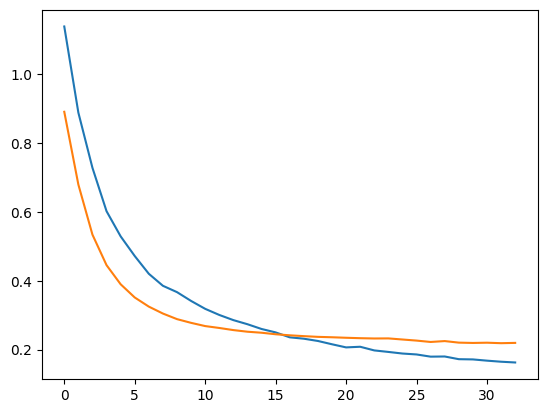

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

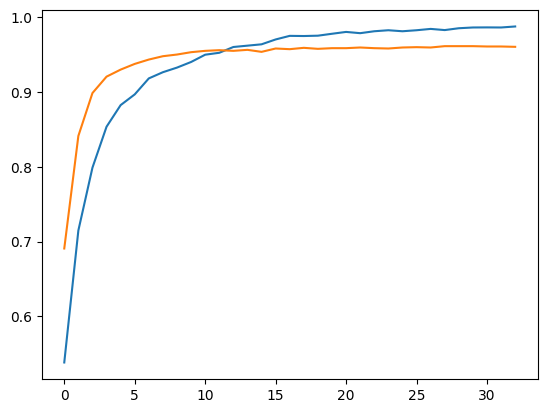

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
pred1 = model.predict(cv_test_array)

88/88 [==============================] - 0s 3ms/step


In [36]:
k=pred1.argmax(axis=1)
k

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
score1 = metrics.accuracy_score(y_test, k)
print("accuracy:   %0.3f" % score1)

accuracy:   0.961


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,k))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1814
           1       0.96      0.94      0.95       511
           2       0.93      0.91      0.92       464

    accuracy                           0.96      2789
   macro avg       0.95      0.94      0.95      2789
weighted avg       0.96      0.96      0.96      2789



Confusion matrix, without normalization


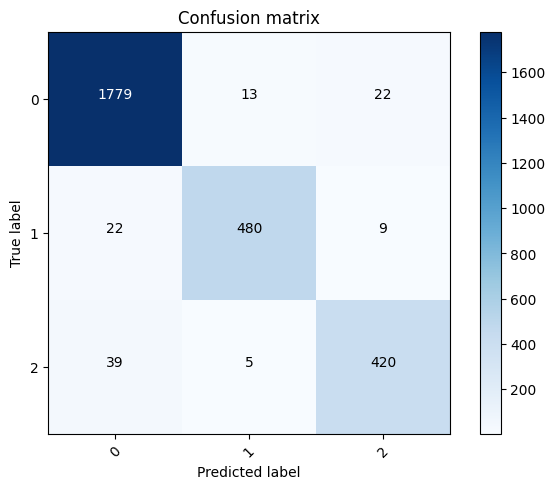

In [39]:
cm = metrics.confusion_matrix(y_test,k, labels=[0,1,2])
plot_confusion_matrix(cm, classes=[0,1,2])

Using TFIDF

In [61]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [62]:
tfidf_train1 = tfidf_train.toarray()
tfidf_test1 = tfidf_test.toarray()

In [92]:
learning_rate = 0.0001
model = Sequential()

In [93]:
model.add(Dense(32,activation='tanh',input_dim=tfidf_train1.shape[1],kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(16,activation='tanh',kernel_regularizer=tensorflow.keras.regularizers.l2(0.002)))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [94]:
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                357568    
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dropout_32 (Dropout)        (None, 16)                0         
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dropout_33 (Dropout)        (None, 16)                0         
                                                                 
 dense_41 (Dense)            (None, 16)               

In [95]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)  

In [96]:
history = model.fit(tfidf_train1,y_train,batch_size=50,epochs=1000,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/1000
179/179 [==============================] - 3s 9ms/step - loss: 1.2136 - accuracy: 0.5958 - val_loss: 1.0617 - val_accuracy: 0.6567
Epoch 2/1000
179/179 [==============================] - 1s 5ms/step - loss: 1.0384 - accuracy: 0.6450 - val_loss: 0.8970 - val_accuracy: 0.6692
Epoch 3/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.8545 - accuracy: 0.7191 - val_loss: 0.6816 - val_accuracy: 0.7934
Epoch 4/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.6911 - accuracy: 0.7877 - val_loss: 0.5696 - val_accuracy: 0.8037
Epoch 5/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.5991 - accuracy: 0.8204 - val_loss: 0.5219 - val_accuracy: 0.8198
Epoch 6/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.5596 - accuracy: 0.8272 - val_loss: 0.4959 - val_accuracy: 0.8561
Epoch 7/1000
179/179 [==============================] - 1s 5ms/step - loss: 0.5255 - accuracy: 0.8417 - val_loss: 0.4758 - val_accuracy:

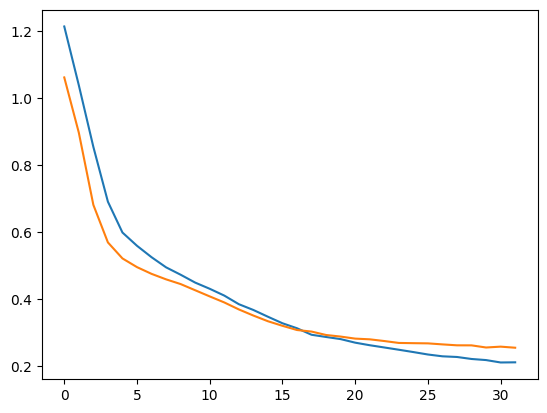

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

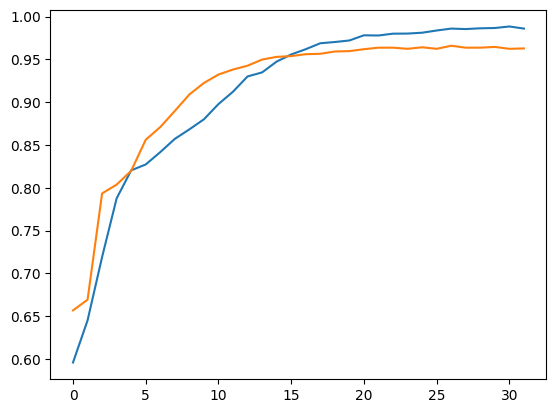

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [99]:
pred2 = model.predict(tfidf_test1)
k1=pred2.argmax(axis=1)
k1

88/88 [==============================] - 0s 2ms/step


array([0, 0, 1, ..., 0, 0, 0])

In [100]:
score2 = metrics.accuracy_score(y_test, k1)
print("accuracy:   %0.3f" % score2)

accuracy:   0.957


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,k1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1814
           1       0.95      0.93      0.94       511
           2       0.94      0.90      0.92       464

    accuracy                           0.96      2789
   macro avg       0.95      0.94      0.94      2789
weighted avg       0.96      0.96      0.96      2789



Confusion matrix, without normalization


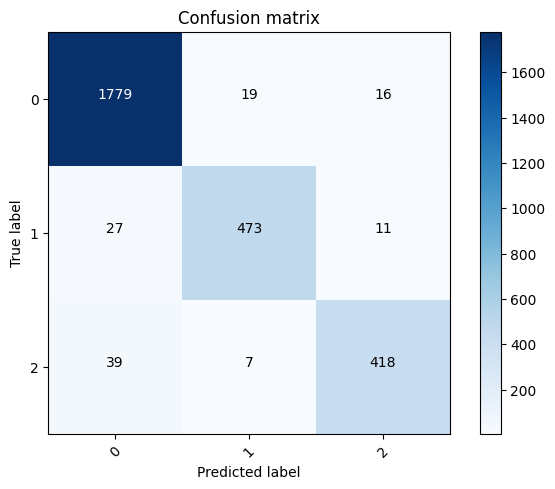

In [102]:
cm = metrics.confusion_matrix(y_test, k1, labels=[0,1,2])
plot_confusion_matrix(cm, classes=[0,1,2])